**Dalex** is a popular library which providers wrappers around various ML frameworks. These wrappers can then be explored and compared with a collection of local and global explainers.


![N|Solid](https://miro.medium.com/max/1400/0*JeD8apOZ5KhdshYd.png)


All plots are interactive, have a neat integration with Plotly and can be saved easily. Dalex doesn’t get left behind in the dashboard space either. Arena is Dalex’s interactive drag and drop dashboard. The visuals are quite good and the interface is neat. A snapshot below from our dataset gives you a glimpse of the dashboard. Code snippet is just a few lines and is given below.


# Import libraries

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
# Built-in libraries
#
import math
import numpy    as np
import pandas   as pd


# Visualization libraries
#
import matplotlib.pyplot as plt
import seaborn           as sns

# Sklearn libraries
#
from sklearn                 import metrics
from sklearn                 import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets        import load_breast_cancer

# Parameters

In [3]:
test_size = 0.1

# Import data

**Breast cancer wisconsin (diagnostic) dataset**
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign




This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.


**References**

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

## Loading data

In [4]:
# Load Breast Cancer dataset
data = load_breast_cancer() 

# Create DataFrame
#
df   = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column
#
df['class'] = data.target


# Show DataFrame
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## Pre-processing data

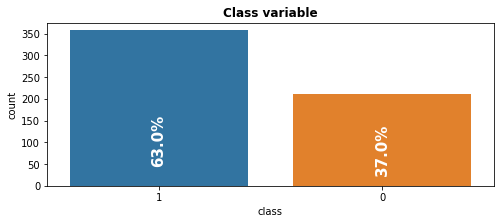

In [5]:
fig = plt.figure(figsize=(8,3))
ax  = sns.countplot(df['class'], order = df['class'].value_counts().index)

#Create annotate
for i in ax.patches:
    ax.text(x        = i.get_x() + i.get_width()/2, 
            y        = i.get_height()/7, 
            s        = f"{np.round(i.get_height()/len(df)*100)}%", 
            ha       = 'center', 
            size     = 15, 
            weight   = 'bold', 
            rotation = 90, 
            color    = 'white');
    

plt.title("Class variable", size=12, weight='bold');

### Training/Testing sets

In [6]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=test_size, random_state=42) 

# Model development

# Setup ML model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost model
#
model = GradientBoostingClassifier( random_state  = 42 )

## Training ML model

In [8]:
model.fit(trainX, trainY);

## Get Predictions


In [9]:
# Calculate prediction
#
pred = model.predict( testX )

# Performance accuracy
#
accuracy = metrics.accuracy_score(testY, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.49%


# Dalex

In [10]:
%%capture
! pip install dalex
! pip install shap
! pip install lime
! pip install flask
! pip install flask_cors
! pip install scipy==1.2 --upgrade

In [11]:
# Explainability libraries
#
import dalex     as dx
import shap
import lime

# Sklearn library
#
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Various library
#
import ipywidgets
from   ipywidgets import IntProgress
import statsmodels
import flask
import flask_cors

## Setup explainer

In [12]:
explainer = dx.Explainer(model, trainX, trainY) # create explainer from Dalex

Preparation of a new explainer is initiated

  -> data              : 512 rows 30 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 512 values
  -> model_class       : sklearn.ensemble._gb.GradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f2bc4b1b170> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000444, mean = 0.619, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0745, mean = -4.44e-06, max = 0.0305
  -> model_info        : package sklearn

A new explainer has been created!


## Explainability/Visualization

### Generate importance plot 

In [13]:
# Generate importance plot showing top 30
#
explainer.model_parts().plot(max_vars=30)

### Generate ROC curve

In [14]:
# Generate ROC curve for model object
#
explainer.model_performance(model_type='classification').plot(geom='roc')

### Generate breakdown plot


In [15]:
# Generate breakdown plot
#
idx = 5

explainer.predict_parts(testX.iloc[idx, :]).plot(max_vars=15)

### Generate SHAP plot

In [16]:
# Generate SHAP plot
# 
idx = 5

explainer.predict_parts(testX.iloc[idx, :], type="shap").plot(min_max=[0,1],max_vars=15)

### Generate breakdown interactions plot 

In [17]:
# Generate breakdown interactions plot 
idx = 5

explainer.predict_parts(X.iloc[idx, :], type='break_down_interactions').plot(max_vars=20)

### Generate residual plots

In [18]:
# Generate residual plots
#
explainer.model_performance(model_type = 'classification').plot()

### Generate PDP plots for all variables 

In [19]:
# Generate PDP plots for all variables 
#
explainer.model_profile(type = 'partial', label="pdp").plot()

Calculating ceteris paribus: 100%|██████████| 30/30 [00:01<00:00, 15.05it/s]


### Generate Accumulated Local Effects plots for all variables 

In [20]:
# Generate Accumulated Local Effects plots for all variables 
#
explainer.model_profile(type = 'ale', label="pdp").plot()

Calculating accumulated dependency: 100%|██████████| 30/30 [00:05<00:00,  5.73it/s]


### Generate Individual Conditional Expectation plots for worst texture variable 


In [21]:
# Generate Individual Conditional Expectation plots for worst texture variable 
#
explainer.model_profile(type = 'conditional', label="conditional",variables="worst texture")

Calculating conditional dependency: 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]


,_vname_,_label_,_x_,_yhat_,_ids_
0,worst texture,conditional,12.0200,0.818148,0
1,worst texture,conditional,12.3952,0.815101,0
2,worst texture,conditional,12.7704,0.812003,0
3,worst texture,conditional,13.1456,0.808855,0
4,worst texture,conditional,13.5208,0.805656,0
...,...,...,...,...,...
96,worst texture,conditional,48.0392,0.368573,0
97,worst texture,conditional,48.4144,0.364481,0
98,worst texture,conditional,48.7896,0.360363,0
99,worst texture,conditional,49.1648,0.356217,0


### Generate lime breakdown plot


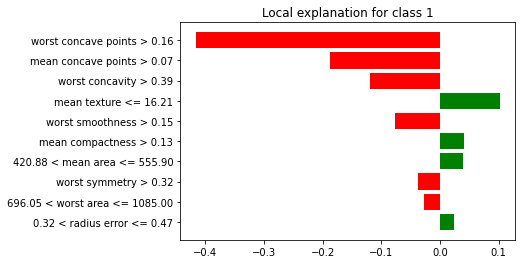

In [26]:
# Generate lime breakdown plot
#
idx = 5

explainer.predict_surrogate(X.iloc[idx]).plot()
